In [46]:
# Importing libraries
import pandas as pd
import numpy as np
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import seaborn as sns

In [47]:
# Creating a driver object for controlling the browser
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

In [48]:
# Creating lists
titles = []
prices = []
ratings = []
pages = 5 # Number of pages to scrape

# Using a loop to gather content
for i in range(1,pages+1):
    url = f"http://books.toscrape.com/catalogue/page-{i}.html"

    driver.get(url) # Making request

    time.sleep(np.random.uniform(3,8))

    title_elements = driver.find_elements(By.XPATH, "//h3/a[contains(@href, 'index.html')]") # x-path to gather titles
    price_elements = driver.find_elements(By.XPATH, "//div/p[contains(@class, 'price_color')]") # x-path to gather prices
    rating_elements = driver.find_elements(By.XPATH, "//article/p[contains(@class, 'star-rating')]") # x-path to gather ratings

    # Appending titles to list
    for t in title_elements:
        titles.append(t.text)

    # Appending prices to list
    for p in price_elements:
        prices.append(p.text)

    # Appending ratings to list
    for r in rating_elements:
        rating_class = r.get_attribute('class') # Text I need is the name of the class itself
        ratings.append(rating_class)

driver.quit() # Closing bot browser window

# Counting length of arrays
print(len(titles))
print(len(prices))
print(len(ratings))

100
100
100


In [49]:
# Creating data frame
df = pd.DataFrame(
    {
        'Title' : titles,
        'Price' : prices,
        'Ratings' : ratings
    }
)

# Checking work
df.head()

,Title,Price,Ratings
0,A Light in the ...,£51.77,star-rating Three
1,Tipping the Velvet,£53.74,star-rating One
2,Soumission,£50.10,star-rating One
3,Sharp Objects,£47.82,star-rating Four
4,Sapiens: A Brief History ...,£54.23,star-rating Five


In [50]:
# Removing currency symbol from 'Price' column
df['Price'] = df['Price'].str[1:]

# Checking work
df.head()

,Title,Price,Ratings
0,A Light in the ...,51.77,star-rating Three
1,Tipping the Velvet,53.74,star-rating One
2,Soumission,50.10,star-rating One
3,Sharp Objects,47.82,star-rating Four
4,Sapiens: A Brief History ...,54.23,star-rating Five


In [51]:
# Converting 'Price' column to numeric format
df['Price'] = pd.to_numeric(df['Price'])

In [52]:
# Converting to USD based on current exchange rate 1.31
df['Price'] = df['Price']*1.31

# Rounding to 2nd decimal place
df['Price'] = df['Price'].round(2)

# Checking my work
df.head()

,Title,Price,Ratings
0,A Light in the ...,67.82,star-rating Three
1,Tipping the Velvet,70.40,star-rating One
2,Soumission,65.63,star-rating One
3,Sharp Objects,62.64,star-rating Four
4,Sapiens: A Brief History ...,71.04,star-rating Five


<Axes: xlabel='Price', ylabel='Count'>

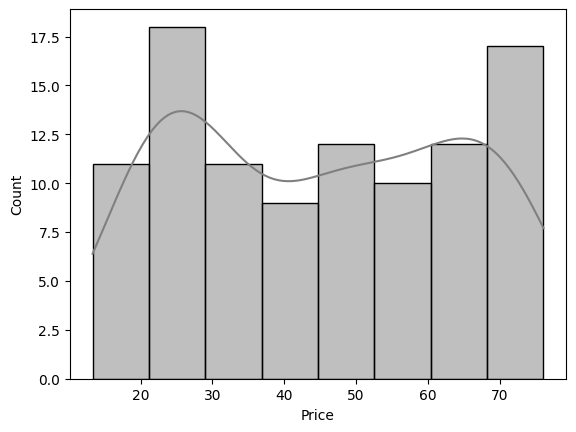

In [53]:
# Plotting distribution of prices
sns.histplot(df['Price'],kde=True,color='grey')

<Axes: ylabel='Price'>

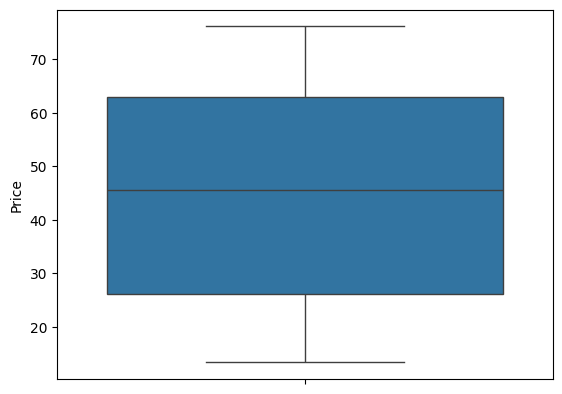

In [54]:
# Plotting box plot of prices
sns.boxplot(df['Price'])

In [55]:
# Handling the 'Ratings' column
df[['junk','Rating']] = df['Ratings'].str.split(' ',expand=True)

# Checking my work
df.head()

,Title,Price,Ratings,junk,Rating
0,A Light in the ...,67.82,star-rating Three,star-rating,Three
1,Tipping the Velvet,70.40,star-rating One,star-rating,One
2,Soumission,65.63,star-rating One,star-rating,One
3,Sharp Objects,62.64,star-rating Four,star-rating,Four
4,Sapiens: A Brief History ...,71.04,star-rating Five,star-rating,Five


In [56]:
# Dropping junk column and original
drop_columns = ['Ratings', 'junk']
df.drop(columns=drop_columns,inplace=True)

# Checking my work
df.head()

,Title,Price,Rating
0,A Light in the ...,67.82,Three
1,Tipping the Velvet,70.40,One
2,Soumission,65.63,One
3,Sharp Objects,62.64,Four
4,Sapiens: A Brief History ...,71.04,Five


In [57]:
# Correcting ratings
df['Rating'].replace({'One':1,'Two':2,'Three':3,'Four':4,'Five':5},inplace=True)

# Checking my work
df.head()

,Title,Price,Rating
0,A Light in the ...,67.82,3
1,Tipping the Velvet,70.40,1
2,Soumission,65.63,1
3,Sharp Objects,62.64,4
4,Sapiens: A Brief History ...,71.04,5
